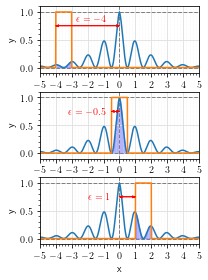

In [3]:
import numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from matplotlib import gridspec

DPI = 300
FILE = True

plt.rcParams['text.usetex'] = True

# Plotting convolution
x = np.arange(-5, 5, 0.005)
y_1 = ((np.cos(2 * math.pi * x) + 1)/(2*np.exp(abs(x*0.75))))
bounds = [(-4, -3), (-0.5, 0.5), (1, 2)]

figure, axes = plt.subplots(figsize=[3, 4], nrows=3, ncols=1)
axes = axes.flat

epsilons = [-4, -0.5, 1]
positions = [[-2.75, 0.825], [-3.25, 0.7], [-2, 0.7]]

for ax, epsilon, (posx, posy), (min, max) in zip(axes, epsilons, positions, bounds):
    ax.set_xticks(np.arange(-5, 5.1, 1))
    ax.axhline(y=0, color='grey', linestyle='--', linewidth=1)
    ax.axhline(y=1, color='grey', linestyle='--', linewidth=1)
    ax.axvline(x=0, color='grey', linestyle='--', linewidth=1)
    x = np.arange(-5, 5, 0.005)
    ax.plot(x, y_1)
    x = np.linspace(-5, 5, 2000)
    y_2 = np.piecewise(x, [x < min, min <= x, max < x], [0, 1, 0])
    ax.plot(x, y_2)
    ax.set_ylabel('y')
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.1, 1.1])
    ax.grid(axis='both', which='major', color='#DDDDDD', linewidth=0.8)
    ax.grid(axis='x', which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    ax.fill_between(x, y_1, 0, where=y_2>y_1, interpolate=True, color='blue', alpha=0.3)
    ax.minorticks_on()
    ax.text(posx, posy, f'$\epsilon = {epsilon}$', color='red')
    ax.arrow(0, 0.75, epsilon, 0, color='red', shape='full', length_includes_head=True, ls='-',
             lw=0.5, zorder=1000, overhang=1, head_width=0.04, head_length=0.2)
    ax.arrow(epsilon, 0.75, -epsilon, 0, color='red', shape='full', length_includes_head=True, ls='-',
             lw=0.5, zorder=1000, overhang=1, head_width=0.04, head_length=0.2)

ax.get_xaxis().set_visible(True)
ax.set_xlabel('x')

plt.tight_layout(h_pad=0.3)

# Outputing the plot to an image or showning it
if FILE:
    plt.savefig('convolutions.png', dpi=DPI)
else:
    plt.show()